# Python for Linear Regression

In [13]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as pyplot
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

In [14]:
data = pd.read_csv("forestfires.csv", sep=",")
print(data.head())
data = data[["X", "Y", "month", "day", "FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain", "area"]]
# data = data[["temp", "rain", "wind", "area"]]
print(data.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [15]:
# Replace the zeroes 
# strings = ["buyingChance", "maintenance", "doors", "people", "boot", "safety", ]

# Loop through the data and replace zeroes with the column mean
for column in data:
    data[column] = data[column].replace("jan", 0)
    data[column] = data[column].replace("feb", 1)
    data[column] = data[column].replace("mar", 2)
    data[column] = data[column].replace("apr", 3)
    data[column] = data[column].replace("may", 4)
    data[column] = data[column].replace("jun", 5)
    data[column] = data[column].replace("jul", 6)
    data[column] = data[column].replace("aug", 7)
    data[column] = data[column].replace("sep", 8)
    data[column] = data[column].replace("oct", 9)
    data[column] = data[column].replace("nov", 10)
    data[column] = data[column].replace("dec", 11)

    data[column] = data[column].replace("sun", 0)
    data[column] = data[column].replace("mon", 1)
    data[column] = data[column].replace("tue", 2)
    data[column] = data[column].replace("wed", 3)
    data[column] = data[column].replace("thu", 4)
    data[column] = data[column].replace("fri", 5)
    data[column] = data[column].replace("sat", 6)

    # data[column] = data[column].replace(0, np.nan)
    # mean = int(data[column].mean(skipna=True))
    #data[column] = data[column].replace(np.nan, mean)
    # data[column].fillna(mean, inplace=True)

print(data["day"])
# print(mean)

0      5
1      2
2      6
3      5
4      0
      ..
512    0
513    0
514    0
515    6
516    2
Name: day, Length: 517, dtype: int64


C:\Users\Phoen\AppData\Local\Temp\ipykernel_11572\3642986261.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace("dec", 11)
C:\Users\Phoen\AppData\Local\Temp\ipykernel_11572\3642986261.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace("sat", 6)


In [16]:
predict = "FFMC"
x = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])

In [17]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1)

In [18]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

-0.0919248264209176


In [19]:
with open("studentmodel.pickle", "wb") as f:
    pickle.dump(linear, f)
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [20]:
print("coefficient: ", linear.coef_)
print("Intercept: ", linear.intercept_)



coefficient:  [ 7.55871953e-02 -2.06196183e-01  4.00852472e-01  8.57554791e-02
  2.52410017e-02 -2.06617315e-03  5.00844267e-01 -4.27251852e-02
 -1.05302282e-01 -9.36632233e-02  7.20469906e-01 -4.84550660e-04]
Intercept:  87.92852187393841


In [21]:
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

87.0975109242158 [  6.    3.    8.    2.   80.7 730.2   6.3  18.2  62.    4.5   0.    0. ] 90.3
92.2302700774636 [  3.    4.    7.    1.  145.4 608.2  10.7  17.1  43.    5.4   0.    0. ] 91.5
92.28743678781115 [  9.    5.    5.    3.   49.5 297.7  14.   28.   34.    4.5   0.    0. ] 93.3
90.88748281406724 [  1.    2.    7.    5.  108.  529.8  12.5  14.7  66.    2.7   0.    0. ] 90.1
87.30591711890453 [  5.    6.    8.    1.  126.5 686.5   7.   14.7  70.    3.6   0.    0. ] 90.9
92.65581329809433 [  4.     5.     8.     4.   137.   706.4    9.2   22.1   34.     1.8
   0.    14.57] 92.9
88.05882428584295 [  9.     4.     8.     2.    73.4  671.9    3.2   24.3   36.     3.1
   0.   105.66] 84.4
82.9150206672835 [ 8.   6.   2.   5.  33.3 77.5  9.   8.3 97.   4.   0.2  0. ] 91.7
89.91323913794508 [  4.     4.    11.     1.    25.4  349.7    2.6    4.6   21.     8.5
   0.     9.77] 85.4
92.09225813944217 [  4.    5.    8.    4.   96.2 739.4   8.6  18.6  24.    5.8   0.    0. ] 92.4
91.279013

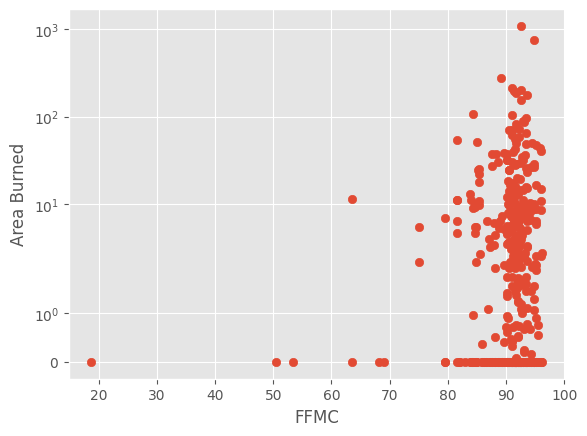

In [22]:
style.use("ggplot")
p = predict
pyplot.scatter(data[p], data["area"])
pyplot.yscale("symlog")
# pyplot.xscale("logit")
pyplot.xlabel(p)
pyplot.ylabel("Area Burned")
pyplot.show()
